In [1]:
import numpy as np
import matplotlib.pyplot as plt

##### Langevin Sampling

```
t = 0
X_0 = N(0,1)

for t -> 0 to 1000:
    Z_t = N(0,1)
    X_t+1 = X_t + (sig/2) * F(X_t) + sqrt(sig) * Z_t

return X_1000
```

X_1000 ~ P_x(X)

Here F(X) = M'(X) (Where M(X) = log P_x(X)) (F(X) tells the direction of increase of likelihood given the Probability Density Function)

In [16]:
samples = np.random.uniform(0,1,30000000)

In [17]:
def generate_dice_samples(samples):
    result=[]
    for sample in samples:
        if 0 <= sample <= 1/6:
            result.append(1)
        elif 1/6 < sample <= 2/6:
            result.append(2)
        elif 2/6 < sample <= 3/6:
            result.append(3)
        elif 3/6 < sample <= 4/6:
            result.append(4)
        elif 4/6 < sample <= 5/6:
            result.append(5)
        elif 5/6 < sample <= 1:
            result.append(6)
    return result

def plot_samples_histogram(samples):
    plt.figure()
    plt.hist(samples)
    plt.xlabel("Samples")
    plt.ylabel("Freq")
    plt.show()

In [ ]:
samples = generate_dice_samples(samples)
plot_samples_histogram(samples)

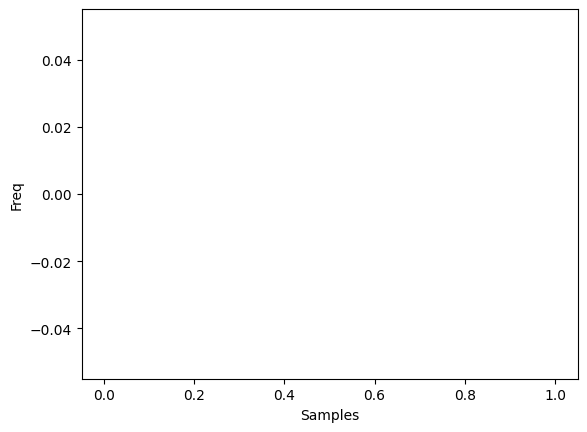

In [9]:
def F(x):
    if 0 <= x <= 1:
        return 0
    elif x < 0:
        return -x
    else:
        return -x

def Langevin_sampling(sig = 0.001):
    
    x = np.random.uniform(0,1,1)
    for i in range(10000):
        zi = np.random.uniform(0,1,1)
        x = x + F(x) + np.sqrt(sig) * zi
    return x

def dice_sampling(size):
    samples = []
    for _ in range(size):
        samples.append(Langevin_sampling())
    return samples

samples = dice_sampling(1000)
samples = generate_dice_samples(samples)
plot_samples_histogram(samples)

In [10]:
samples

[]

## PCA

1. Fit a line that best represents the datapoints (the line must pass through origin) by maximizing the distance between the origin and the projected point of the datapoint on the line.

2. The sum of squared distances between the origin and the projected points after the bestfit line is found is the eigen value or variance of that principal component (which is the eigen vector).

3. The next PC is the line perpendicular to the previous PCs and passing through the origin... and so on

For Example If you have the data points below

| Feature   | Sampl 1 | Sampl 2 | Sampl 3 | Sampl 4 | Sampl 5 | Sampl 6 |
|-----------|---------|---------|---------|---------|---------|---------|
| feature_1 | 8.1     | 9.4     | 7.6     | 1.2     | 2.2     | 0.7     |
| feature_2 | 2.3     | 2.4     | 1.1     | 2.6     | 1.7     | 2.3     |

3 Things to keep track of is that:

    1. The first point where we fit a line can be interpreted as centering the data points along the feature axis to 0